In [1]:
import numpy as np
from numpy import polyval,polyder
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

# 1) Determine todos os mínimos do polinômio p(x) = 0.034x^4  -0.2x^3  -0.12x^2 + 0.35x + 4.

Ajuda: Use as funções numpy.polyval e numpy.polyder

In [2]:
#p(x) = 0.034x^4  -0.2x^3  -0.12x^2 + 0.35x + 4.
def funcao1(x): #função para retorno do polinomio acima
  return np.polyval([0.034,-0.2,-0.12,0.35,4], x)

def derivadafuncao1(x): #função retornando a derivada (usando np.polyder)
  return np.polyval(np.polyder([0.034,-0.2,-0.12,0.35,4]),x)

#função para calculo da descida do gradiente explicito com uma dimensão
#n_iter = numero de descidas
#alpha = step
def gradient_descent_uni(objective, derivative, x0,n_iter=20, alpha=.2):
    x = x0
    lista_x = []
    lista_x.append(x)
    
    for i in range(0, n_iter):
        gradient = derivative(x) #calcula o gradient em x
        x = x - alpha * gradient #x recebe o novo ponto usando o gradiente e o step
        lista_x.append(x) #salva o x numa lista (para dps apresentar em um gráfico)
        #o ultimo valor da lista, se o alpha e o numero de interações forem suficiente,será o minimo
    return lista_x

Questão 01:
1º mínimo (ponto de partida: -3.00): -0.8858
2º mínimo (ponto de partida: 8.00): 4.6716


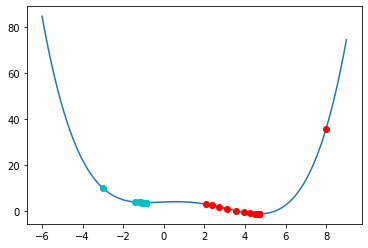

In [3]:
start11 = -3 #ponto de partida da primeira descida
start12 = 8  #ponto de partida da segunda  descida
grad11 = (gradient_descent_uni(funcao1, derivadafuncao1, start11)) #grad vai receber uma lista, de todos os x, sendo o último [-1] o mínimo
grad12 = (gradient_descent_uni(funcao1, derivadafuncao1, start12))

#impressão da resposta da questão 1
print("Questão 01:")
print("1º mínimo (ponto de partida: %0.2f): %0.4f" % (start11,grad11[-1]))
print("2º mínimo (ponto de partida: %0.2f): %0.4f" % (start12,grad12[-1]))

#código abaixo para impressão do gráfico

t1 = np.arange(-6, 9, 0.002)
plt.plot(t1, funcao1(t1))

for x_descida in grad11:
  plt.plot(x_descida,funcao1(x_descida),'co')

for x_descida2 in grad12:
  plt.plot(x_descida2,funcao1(x_descida2),'ro')


# 2) Determine todos os mínimos da função unidimensional 'klingon_obfuscate' em anexo.

Ajuda: O gradiente  estimado pode assumir valores absolutos grandes. Nesse caso talvez seja melhor a direção de descida normalizada.

In [4]:
def klingon_obfuscate(x):
    p=43.726381097527480154;_q=87366.66353*544;__r=32.445555344434434434;
    r=75.432109876543210987;k=3;
    a=32.445555344434434434;c=73.524325552552556555;o=35.353535353535353535;
    _r=35.353535353535353535;q=55.555555555555555555;
    m=35.353535353535353535;
    i=87366.66353*544;j=26655252*52445265.34;
    arr = np.concatenate([o*np.array(np.ones(2)), p*np.array(np.ones(1)),
     q*np.array(np.ones(4)), r*np.array(np.ones(3))])
    _7625783832993yy=(1e0*(12.0/4.0-2)*(x-arr[0])*(x-arr[1])*(x-arr[2])
    *(x-arr[3])*(x-arr[4])*(x-arr[5])
    *(x-arr[9-3])*(x-arr[7])*(x-arr[8])*(x-arr[9]))
    _7625783832993_yy=(1e0*(12.0/4.0-2)*(x-arr[2])*(x-arr[1])*(x-arr[2])
    *(x-arr[3])*(x-arr[4])*(x-arr[5])
    *(x-arr[9-3])*(x-arr[7])*(x-arr[8])*(x-arr[9]))

    return _7625783832993yy

def Calculate_Gradient_uni(x):
    h = 0.01
    z = klingon_obfuscate(x)
    dx = np.sign((klingon_obfuscate(x + h) - z)/h)
    return dx


def Calculate_Descent_Gradient_uni(x0, n_iter=20,step=.2):
    x = x0
    lista_x = []
    for i in range(0, n_iter): 
      x = x - step * Calculate_Gradient_uni(x)
      lista_x.append(x)
    return lista_x

Questão 02:
1º mínimo (ponto de partida: 34.00): 35.2000
2º mínimo (ponto de partida: 50.00): 46.4000
3º mínimo (ponto de partida: 70.00): 68.4000


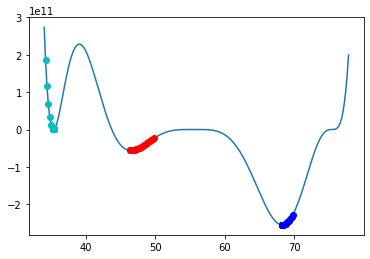

In [5]:
start21 = 34
start22 = 50
start23 = 70

grad21 = (Calculate_Descent_Gradient_uni(start21))
grad22 = (Calculate_Descent_Gradient_uni(start22))
grad23 = (Calculate_Descent_Gradient_uni(start23))

print("Questão 02:")
print("1º mínimo (ponto de partida: %0.2f): %0.4f" % (start21,grad21[-1]))
print("2º mínimo (ponto de partida: %0.2f): %0.4f" % (start22,grad22[-1]))
print("3º mínimo (ponto de partida: %0.2f): %0.4f" % (start23,grad23[-1]))

#código abaixo para impressão do gráfico

t = np.arange(34., 78., 0.2)
plt.plot(t, klingon_obfuscate(t))
for x_descida in grad21:
  plt.plot(x_descida,klingon_obfuscate(x_descida),'co')
for x_descida2 in grad22:
  plt.plot(x_descida2,klingon_obfuscate(x_descida2),'ro')
for x_descida3 in grad23:
  plt.plot(x_descida3,klingon_obfuscate(x_descida3),'bo')


# 3) Determine todos os mínimos da função bidimensional

f(x1, x2) = (x1^2 + x2 - 11)^2 + (x1 + x2^2 -7)^2

f(x, g) = (x² + g - 11)² + (x + g² -7)²

3a) Use o gradiente explícito no algoritmo da descida de gradiente

3b) Use o método de diferenças finitas para aproximar o gradiente

In [6]:
#f(x, y) = (x² + y - 11)² + (x + y² -7)²

def funcao3(x):
    x,y = x
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


# 3a) Use o gradiente explícito no algoritmo da descida de gradiente

In [7]:
#dx = 4x³+4xy-42x+2y²-14
def derivadafuncao3_x(x):
  x,y = x
  return (4 * x**3) + (4 * x * y) - (42 * x) + (2 * y**2) - (14)

#dy = 4y³+4xy-26y+2x²-22
def derivadafuncao3_y(x):
  x,y = x
  return (4 * y**3) + (4 * x * y) - (26 * y) + (2 * x**2) - (22)

def derivadafuncao3(x):
  return derivadafuncao3_x(x),derivadafuncao3_y(x)

def calculate_gradient_multi_explicito(x):
  dx,dy = derivadafuncao3(x)
  return np.array([dx, dy])

def calculate_gradient_descent_multi_explicito(x, step=.00001):
    x = x - step * calculate_gradient_multi_explicito(x)
    return x

def calcula_a(xy0,n_iter=10000):
  xie = xy0  #local de inicio
  xse = []
  zse = []

  for i in range(n_iter):
      zie = funcao3(xie)
      xse.append(xie)
      zse.append(zie)
      xie = calculate_gradient_descent_multi_explicito(xie)

  xse = np.array(xse)
  zse = np.array(zse)
  return xse,zse

Questão 03.A:
1º mínimo (ponto de partida: (1.00,1.00)): ( 2.9882 , 2.0212 )
2º mínimo (ponto de partida: (-1.00,1.00)): ( -2.7856 , 3.1268 )
3º mínimo (ponto de partida: (-1.00,-1.00)): ( -3.7452 , -3.2250 )
4º mínimo (ponto de partida: (1.00,-1.00)): ( 3.5602 , -1.5890 )


(-6.05, 6.05, -6.025, 5.525)

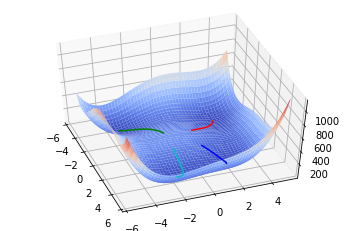

In [8]:
start3a1 = np.array([1,1])
start3a2 = np.array([-1,1])
start3a3 = np.array([-1,-1])
start3a4 = np.array([1,-1])

xye1,ze1 = calcula_a(start3a1)
xye2,ze2 = calcula_a(start3a2)
xye3,ze3 = calcula_a(start3a3)
xye4,ze4 = calcula_a(start3a4)

print("Questão 03.A:")
print("1º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a1[0],start3a1[1],xye1[-1][0],xye1[-1][1]))
print("2º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a2[0],start3a2[1],xye2[-1][0],xye2[-1][1]))
print("3º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a3[0],start3a3[1],xye3[-1][0],xye3[-1][1]))
print("4º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a4[0],start3a4[1],xye4[-1][0],xye4[-1][1]))



xye = np.array(\
    [np.outer(np.linspace(-5.5,5.5,100), np.ones(100)), \
    np.outer(np.ones(100), np.linspace(-5.5,5.0,100))],
        )

ze = funcao3(xye)

axes = plt.axes(projection='3d')
axes.view_init(50, -20)
axes.plot_surface(xye[0,:], xye[1,:], ze, cmap=cm.coolwarm)
axes.plot(xye1[:, 0], xye1[:, 1], ze1, '-',c='b', zorder=100)
axes.plot(xye2[:, 0], xye2[:, 1], ze2, '-',c='r', zorder=100)
axes.plot(xye3[:, 0], xye3[:, 1], ze3, '-',c='g', zorder=100)
axes.plot(xye4[:, 0], xye4[:, 1], ze4, '-',c='c', zorder=100)
plt.axis('on')


# 3b) Use o método de diferenças finitas para aproximar o gradiente

In [9]:
def Calculate_Gradient_multi(x):
    h = 0.01
    h1 = np.array([h, 0.0])
    h2 = np.array([0.0, h])
    z = funcao3(x)
    dx = (funcao3(x + h1) - z) / h
    dy = (funcao3(x + h2) - z) / h
    return np.array([dx, dy])

def Calculate_Descent_Gradient_multi(x, step=.003):
    x = x - step * Calculate_Gradient_multi(x)
    return x

def calcula_b(xy,n_iter=1000):
  xi = xy  #local de inicio
  xs = []
  zs = []

  for i in range(n_iter):
      zi = funcao3(xi)
      xs.append(xi)
      zs.append(zi)
      xi = Calculate_Descent_Gradient_multi(xi)

  xs = np.array(xs)
  zs = np.array(zs)
  return xs,zs

Questão 03.B:
1º mínimo (ponto de partida: (0.00,0.00)): ( 2.9957 , 1.9975 )
2º mínimo (ponto de partida: (-1.00,0.00)): ( -2.8100 , 3.1264 )
3º mínimo (ponto de partida: (-1.00,-1.00)): ( -3.7860 , -3.2903 )
4º mínimo (ponto de partida: (1.00,-2.00)): ( 3.5797 , -1.8520 )


(-6.05, 6.05, -6.025, 5.525)

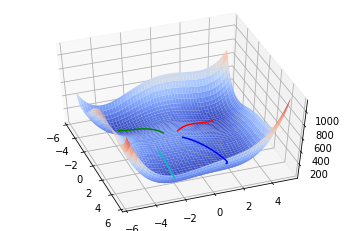

In [10]:
start3b1 = np.array([0,0])
start3b2 = np.array([-1,0])
start3b3 = np.array([-1,-1])
start3b4 = np.array([1,-2])

xyf1,zf1 = calcula_b(start3b1)
xyf2,zf2 = calcula_b(start3b2)
xyf3,zf3 = calcula_b(start3b3)
xyf4,zf4 = calcula_b(start3b4)

print("Questão 03.B:")
print("1º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b1[0],start3b1[1],xyf1[-1][0],xyf1[-1][1]))
print("2º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b2[0],start3b2[1],xyf2[-1][0],xyf2[-1][1]))
print("3º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b3[0],start3b3[1],xyf3[-1][0],xyf3[-1][1]))
print("4º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b4[0],start3b4[1],xyf4[-1][0],xyf4[-1][1]))


xyf = np.array(\
    [np.outer(np.linspace(-5.5,5.5,100), np.ones(100)), \
    np.outer(np.ones(100), np.linspace(-5.5,5.0,100))],
        )

zf = funcao3(xyf)

axes = plt.axes(projection='3d')
axes.view_init(50, -20)
axes.plot_surface(xyf[0,:], xyf[1,:], zf, cmap=cm.coolwarm)
axes.plot(xyf1[:, 0], xyf1[:, 1], zf1, '-',c='b', zorder=100)
axes.plot(xyf2[:, 0], xyf2[:, 1], zf2, '-',c='r', zorder=100)
axes.plot(xyf3[:, 0], xyf3[:, 1], zf3, '-',c='g', zorder=100)
axes.plot(xyf4[:, 0], xyf4[:, 1], zf4, '-',c='c', zorder=100)

plt.axis('on')



In [11]:
print("Questão 01:")
print("1º mínimo (ponto de partida: %0.2f): %0.4f" % (start11,grad11[-1]))
print("2º mínimo (ponto de partida: %0.2f): %0.4f" % (start12,grad12[-1]))

print("\nQuestão 02:")
print("1º mínimo (ponto de partida: %0.2f): %0.4f" % (start21,grad21[-1]))
print("2º mínimo (ponto de partida: %0.2f): %0.4f" % (start22,grad22[-1]))
print("3º mínimo (ponto de partida: %0.2f): %0.4f" % (start23,grad23[-1]))


print("\nQuestão 03.A:")
print("1º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a1[0],start3a1[1],xye1[-1][0],xye1[-1][1]))
print("2º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a2[0],start3a2[1],xye2[-1][0],xye2[-1][1]))
print("3º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a3[0],start3a3[1],xye3[-1][0],xye3[-1][1]))
print("4º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3a4[0],start3a4[1],xye4[-1][0],xye4[-1][1]))

print("\nQuestão 03.B:")
print("1º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b1[0],start3b1[1],xyf1[-1][0],xyf1[-1][1]))
print("2º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b2[0],start3b2[1],xyf2[-1][0],xyf2[-1][1]))
print("3º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b3[0],start3b3[1],xyf3[-1][0],xyf3[-1][1]))
print("4º mínimo (ponto de partida: (%0.2f,%0.2f)): ( %0.4f , %0.4f )" % (start3b4[0],start3b4[1],xyf4[-1][0],xyf4[-1][1]))


Questão 01:
1º mínimo (ponto de partida: -3.00): -0.8858
2º mínimo (ponto de partida: 8.00): 4.6716

Questão 02:
1º mínimo (ponto de partida: 34.00): 35.2000
2º mínimo (ponto de partida: 50.00): 46.4000
3º mínimo (ponto de partida: 70.00): 68.4000

Questão 03.A:
1º mínimo (ponto de partida: (1.00,1.00)): ( 2.9882 , 2.0212 )
2º mínimo (ponto de partida: (-1.00,1.00)): ( -2.7856 , 3.1268 )
3º mínimo (ponto de partida: (-1.00,-1.00)): ( -3.7452 , -3.2250 )
4º mínimo (ponto de partida: (1.00,-1.00)): ( 3.5602 , -1.5890 )

Questão 03.B:
1º mínimo (ponto de partida: (0.00,0.00)): ( 2.9957 , 1.9975 )
2º mínimo (ponto de partida: (-1.00,0.00)): ( -2.8100 , 3.1264 )
3º mínimo (ponto de partida: (-1.00,-1.00)): ( -3.7860 , -3.2903 )
4º mínimo (ponto de partida: (1.00,-2.00)): ( 3.5797 , -1.8520 )
